# **Fake News Detection: EDA**

# **Set Up**
---

In [14]:
# Imports for Dataset
import time
import numpy as np
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
nltk.download('stopwords')

# Data Visualization
import matplotlib.pyplot as plt

In [15]:
# Data set management
CLASS_NAMES = ["Fake", "Real"]
MAPPING_DICT = {
    "Fake":0,
    "Real":1
}

# **Data Loading & Pre-Processing**
---

In [16]:
fake_news_filepath = "Fake.csv"
real_news_filepath = "True.csv"

In [17]:
fake_df = pd.read_csv(fake_news_filepath)
real_df = pd.read_csv(real_news_filepath)

In [18]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [19]:
real_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [20]:
# Classification Labels
real_df["Label"] = "Real"
fake_df["Label"] = "Fake"

In [21]:
df = pd.concat([fake_df, real_df])
df.reset_index()
df.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [22]:
print(f"Dataset Size: {len(df)}")

Dataset Size: 44898


In [23]:
data = df.sample(3000).drop(columns=["title", "subject", "date"])
data.Label = data.Label.map(MAPPING_DICT)
data.sample(10)

,text,Label
20020,"About a month ago, people started noticing a l...",0
12765,A longtime Republican financial backer who att...,0
7783,Probably the most highly coveted endorsement b...,0
14686,The days of Hillary s past being off limits ...,0
5413,"It s still a few months before the election, s...",0
20080,University of Michigan is located in Ann Arbor...,0
7481,KUALA LUMPUR (Reuters) - Malaysian Prime Minis...,1
19383,Says the guy who s been funding riots across ...,0
6655,(Reuters) - President-elect Donald Trump will ...,1
18663,You re never to young to commit jihad Teachers...,0


# **Data Visualization**

---

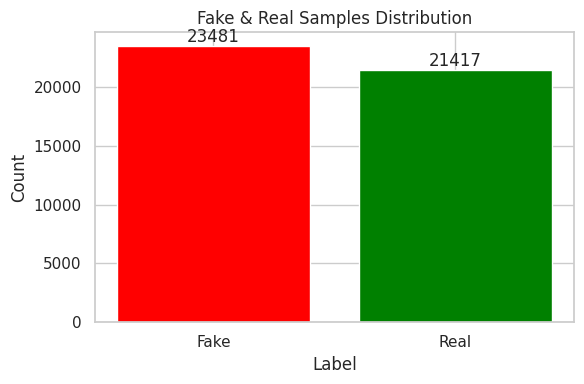

In [24]:
# Count the number of fakes and Real
label_counts = df["Label"].value_counts()

plt.figure(figsize=(6, 4))
bars = plt.bar(label_counts.index, label_counts.values, color=["red", "green"])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha="center", va="bottom")

plt.title("Fake & Real Samples Distribution")
plt.xlabel("Label")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

It was found that the distribution of positive and negative samples in the dataset was relatively balanced.

/tmp/ipykernel_65454/4292118389.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
/tmp/ipykernel_65454/4292118389.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_65454/4292118389.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


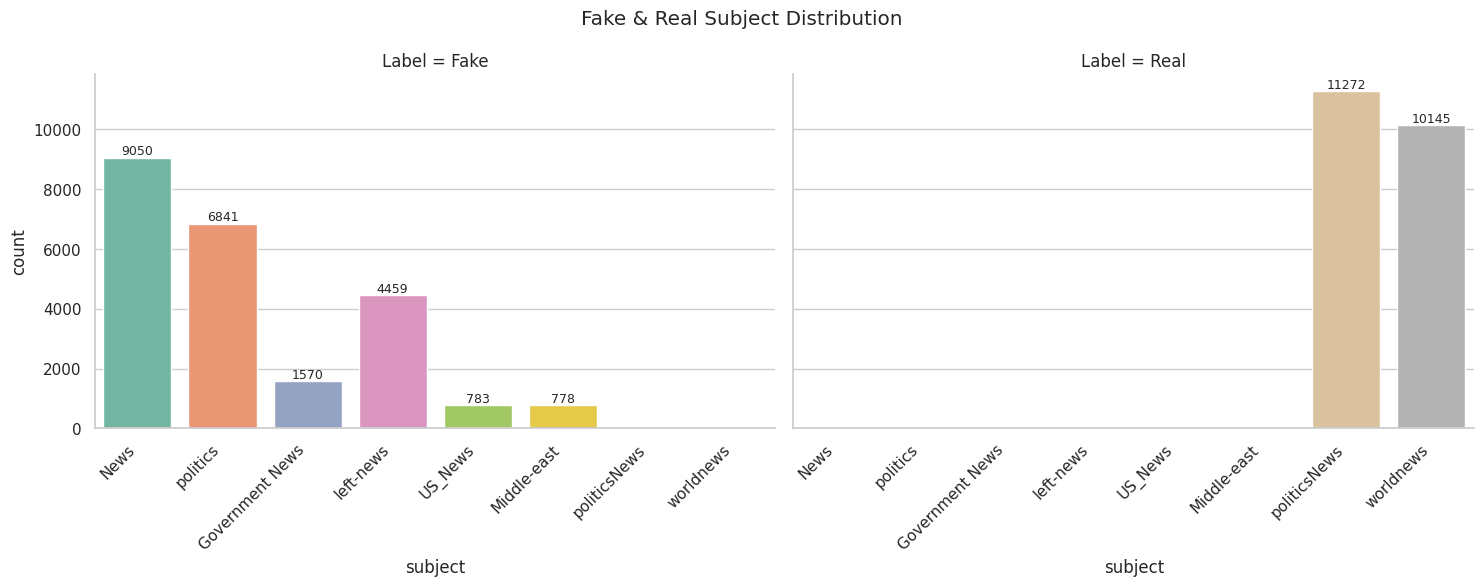

In [25]:
import seaborn as sns

sns.set(style="whitegrid")

# Create FacetGrid and facet by Label
g = sns.catplot(
    data=df,
    x="subject",
    kind="count",
    col="Label",
    palette="Set2",
    height=5,
    aspect=1.5
)

# Add column chart labels
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            int(height),
            ha="center",
            va="bottom",
            fontsize=9
        )
    # Rotate the horizontal coordinate labels to avoid overlapping.
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Fake & Real Subject Distribution")

plt.show()

It was found that the dataset was unbalanced in terms of topic distribution, so "subject" was not used as a classification feature.

In [13]:
list(filter(lambda x: len(str(x))>20, df.date.unique()))

['https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg',
 'https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/',
 'https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/',
 'MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video]',
 'https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/']

The sample time may sometimes be a long text or an hyperlink, and date is not regarded as a classification feature.